In [1]:
import json
import pandas as pd

with open('data/train.json', 'r') as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

In [2]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [3]:
from functools import reduce
import numpy as np

texts = [['i', 'have', 'a', 'cat'],
         ['he', 'have', 'a', 'dog'],
         ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]

dictionary = list(enumerate(set(reduce(lambda x, y: x + y, texts))))

def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i, word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector

for t in texts:
    print(vectorize(t))

[0. 0. 1. 1. 1. 0. 1.]
[0. 1. 1. 0. 0. 1. 1.]
[2. 1. 1. 1. 1. 1. 2.]


In [12]:
# Let's draw plots!
from scipy.spatial.distance import euclidean
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy.stats import beta, shapiro
from sklearn.preprocessing import StandardScaler

# Let's take the price feature from Renthop dataset and filter by hands the most extreme values for clarity

price = df.price[(df.price <= 20000) & (df.price > 500)]
price_log = np.log(price)

# A lot of gestures so that sklearn didn't shower us with warnings
price_mm = (
    MinMaxScaler()
    .fit_transform(price.values.reshape(-1, 1).astype(np.float64))
    .flatten()
)
price_z = (
    StandardScaler()
    .fit_transform(price.values.reshape(-1, 1).astype(np.float64))
    .flatten()
)

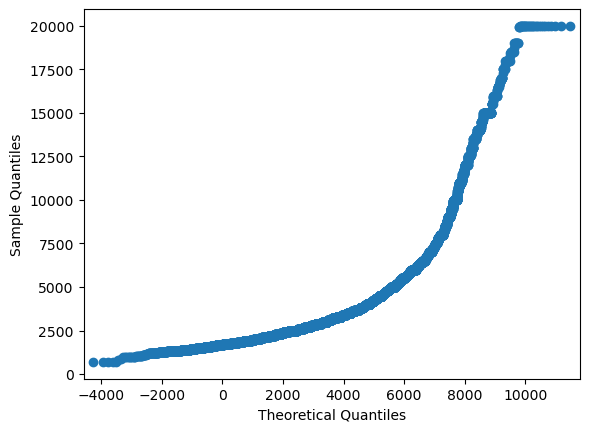

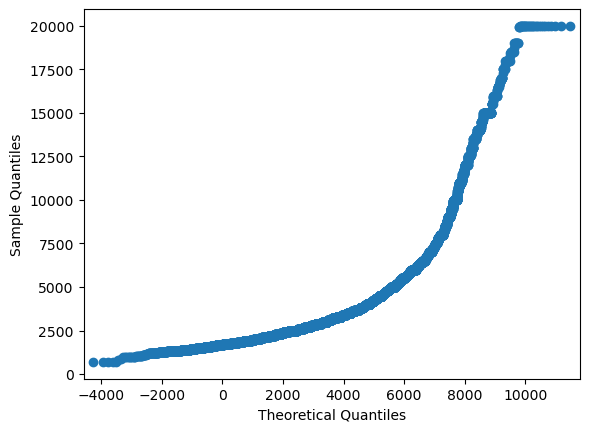

In [15]:
#Q-Q plot of the initial feature

sm.qqplot(price, loc=price.mean(), scale=price.std())

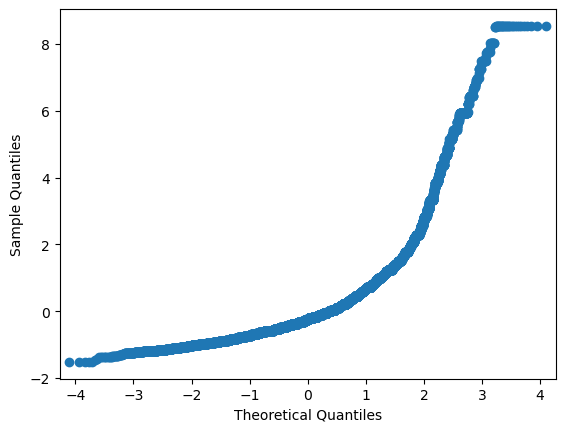

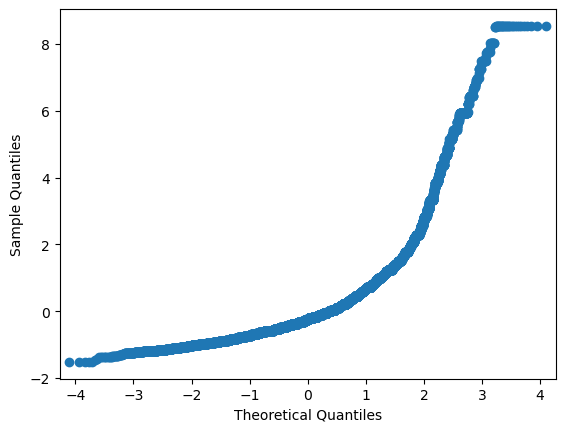

In [16]:
#Q-Q plot after StandardScaler

sm.qqplot(price_z, loc=price_z.mean(), scale=price_z.std())

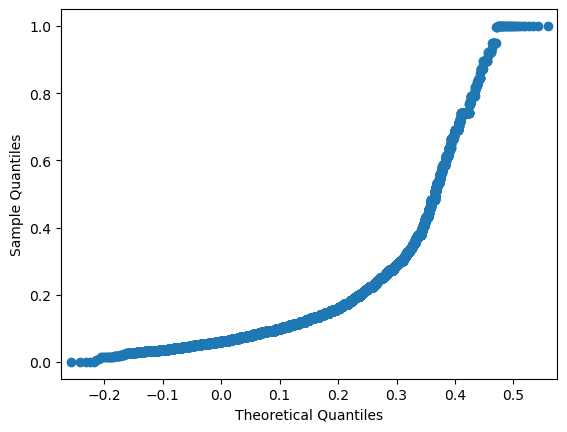

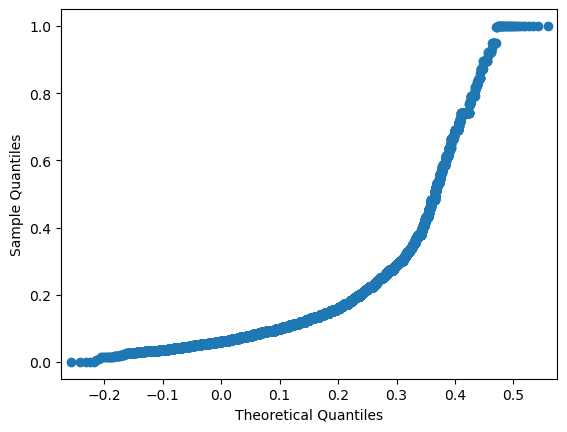

In [17]:
#Q-Q plot after MinMaxScaler. Shape doesn’t change

sm.qqplot(price_mm, loc=price_mm.mean(), scale=price_mm.std())

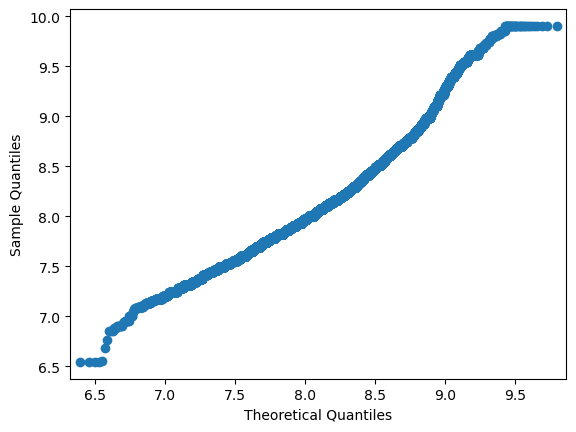

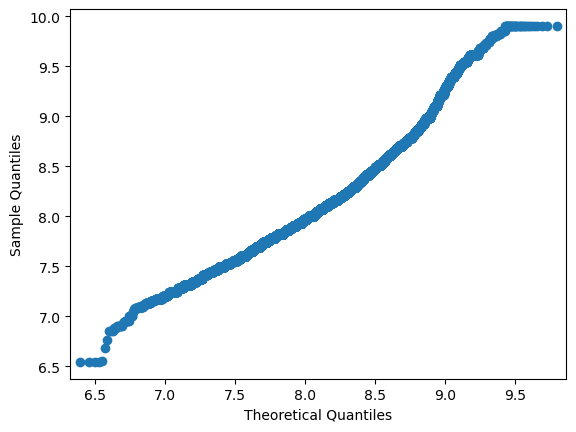

In [18]:
#Q-Q plot after taking the logarithm. T

sm.qqplot(price_log, loc=price_log.mean(), scale=price_log.std())

In [19]:
rooms = df["bedrooms"].apply(lambda x: max(x, 0.5))
# Avoid division by zero; .5 is chosen more or less arbitrarily
df["price_per_bedroom"] = df["price"] / rooms